<a href="https://colab.research.google.com/github/SLIIT-Y4-Research-Group/Suwa-Manasa-Mobile-App-Research-Project-/blob/Kavindi/GRU_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 2: Navigate to your dataset folder
import os
dataset_path = "/content/drive/My Drive/ResearchStory/dataset2"
os.listdir(dataset_path)

['හා හාමිගේ කතාව.txt',
 'අම්මා.txt',
 'ගමරාළ පිට්ටු උයපු හැටි.txt',
 'වලිගෙ තමයි ලෙඩේ.txt',
 'රයිගමයයි ගම්පලයයි.txt',
 'සිල් ගත්ත පූසා.txt',
 'රාජා හෝ, මා හෝ, ගංගා හෝ.txt',
 'හීනැටි හාලෙ බත් කෑ ගමරාල – 2.txt',
 'ගමරාල හීනැටි හාලෙ බත් කෑ හැටි.txt',
 'බත් අමු වූ හැටි.txt',
 'නටපු නැටුමකුත් නෑ බෙරේ පලුවකුත් නෑ.txt',
 'ගමරාලගෙ දූ පොඩිත්ත – 2.txt',
 'ගමරාලගෙ දූ පොඩිත්ත.txt',
 'සුළඟේ ගිය පුළුන් ගුලිය – ඉතිරිය.txt',
 'සුළඟේ ගිය පුළුන් ගුලිය.txt',
 'රාජකීය විකට නළු අන්දරේ.txt',
 'මහා සෝන යක්ෂයා හෙවත් රිටිගල ජයසේන.txt',
 'ගොවියා ස්වර්ගයට ගියේය.txt',
 'කලාගේ කතාව.txt',
 'කටුවල කෑම.txt',
 'ගමරාලයි නරි නයිදෙයි.txt',
 'රජ්ජුරුවෝ කුඩු කෑවා.txt',
 'අන්දරේ - ශ්\u200dරී ලංකාවේ ප්\u200dරසිද්ධ උසාවි විහිළුකාරයා.txt',
 'රාජකීය පොකුණේ අන්දරේ.txt',
 'අන්දරේගේ බිරිඳ සහ රැජින.txt',
 'අන්දරේ රජුගේ ජම්බු කෑ ආකාරය.txt',
 'මවුන්ට් ලවීනියාව.txt',
 'සිංහබාහු.txt',
 'රාම සහ සීතා.txt',
 'විහාර මහා දේවි රැජින.txt',
 'සීගිරියේ පුරාවෘත්තය.txt',
 'ගමරාලගේ දියණිය.txt',
 'මහා පෘථිවිය නිර්ම

In [7]:
import pandas as pd
import json
import re

# Load dataset (adjust based on your file type)
def load_stories_from_folder(folder_path):
    stories = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as f:
                stories.append(f.read())
    return stories

stories = load_stories_from_folder(dataset_path)
print(f"Total stories: {len(stories)}")
print("First story preview:", stories[0][:500])

Total stories: 99
First story preview: ඔන්න එක කැලයක ලස්සන හාවෙක් ජිවත් වුණා. මේ හාවාට තිබුණා ලස්සන දිග රැවුලක්. දවසක් මේ හාවාට හිතුණා උගේ රැවුල කපන්න. ඉතින් හාවා බාබර් සාප්පුවට ගියා රැවුල කපාගන්න.

''කරුණාකරලා මගේ මේ රැවුල කපනවද?'' හාවා බාබර් උන්නැහේට කිව්වා.

බාබර් උන්නැහේත් හාවාගේ රැවුල කැපුවා.

හාවා හරි සතුටින් ගෙදර ගියා. ටික වෙලාවක් යනකොට හාවාට හිතුණා ''අනේ මගේ රැවුල තිබුණන් කොච්චර හොදද'' කියලා. හාවා ආපහු බාබර් සාප්පුවට ගිහින් එයාගෙ රැවුල ඉල්ලුවා.

''මම කොහොමද ඔයාගේ රැවුල දෙන්නෙ. මෙච්චර වෙලා කපපු රැවුල්, කොණ්ඩ ඔක්කොම අතුගාලා දැ


In [8]:
def clean_sinhala_text(text):
    # Remove non-Sinhala characters and extra whitespace
    text = re.sub(r'[^අ-ෆ.,!?…\s]', '', text)
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_stories = [clean_sinhala_text(story) for story in stories]
print("Cleaned sample:", cleaned_stories[0][:300])

Cleaned sample: ඔනන එක කලයක ලසසන හවක ජවත වණ. ම හවට තබණ ලසසන දග රවලක. දවසක ම හවට හතණ උග රවල කපනන. ඉතන හව බබර සපපවට ගය රවල කපගනන. කරණකරල මග ම රවල කපනවද? හව බබර උනනහට කවව. බබර උනනහත හවග රවල කපව. හව හර සතටන ගදර ගය. ටක වලවක යනකට හවට හතණ අන මග රවල තබණන කචචර හදද කයල. හව ආපහ බබර සපපවට ගහන එයග රවල ඉලලව. මම කහමද ඔයග රවල දනන.


In [9]:
# Combine all stories
full_text = ' '.join(cleaned_stories)
chars = sorted(list(set(full_text)))
print(f"Total unique characters: {len(chars)}")

# Create character mappings
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}

# Save vocabulary
vocab_path = "/content/drive/My Drive/ResearchStory/vocabulary/"
os.makedirs(vocab_path, exist_ok=True)

with open(os.path.join(vocab_path, 'char_to_idx.json'), 'w', encoding='utf-8') as f:
    json.dump(char_to_idx, f, ensure_ascii=False)

with open(os.path.join(vocab_path, 'idx_to_char.json'), 'w', encoding='utf-8') as f:
    json.dump(idx_to_char, f, ensure_ascii=False)

print("Vocabulary saved.")

Total unique characters: 55
Vocabulary saved.


In [6]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert text to indices
text_as_int = [char_to_idx[ch] for ch in full_text]

# Parameters
SEQ_LENGTH = 100  # Context window
STEP_SIZE = 3     # Stride for creating more sequences

# Create sequences
sequences = []
next_chars = []

for i in range(0, len(text_as_int) - SEQ_LENGTH, STEP_SIZE):
    sequences.append(text_as_int[i:i + SEQ_LENGTH])
    next_chars.append(text_as_int[i + SEQ_LENGTH])

# Convert to numpy arrays
X = np.array(sequences)
y = np.array(next_chars)

print(f"Total sequences: {len(X)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# One-hot encode y for categorical crossentropy
y_categorical = to_categorical(y, num_classes=len(chars))
print(f"y_categorical shape: {y_categorical.shape}")

Total sequences: 58812
X shape: (58812, 100), y shape: (58812,)
y_categorical shape: (58812, 55)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Parameters
VOCAB_SIZE = len(chars)
EMBEDDING_DIM = 256
GRU_UNITS = 512

# Build model WITHOUT input_length parameter
model = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_DIM),  # Removed input_length
    Bidirectional(GRU(GRU_UNITS, return_sequences=True)),
    Dropout(0.3),
    BatchNormalization(),
    Bidirectional(GRU(GRU_UNITS)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(GRU_UNITS, activation='relu'),
    Dropout(0.3),
    Dense(VOCAB_SIZE, activation='softmax')
])

# Explicitly build the model
model.build(input_shape=(None, SEQ_LENGTH))

# Compile with adjusted learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 256)       │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 1024)      │     2,365,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 1024)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 1024)      │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 1024)           │     4,724,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 55)             │        28,215 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,665,463 (29.24 MB)

 Trainable params: 7,661,367 (29.23 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [12]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint(
        filepath='/content/drive/My Drive/ResearchStory/models/best_gru_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# Split data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=128,
    epochs=100,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.2279 - loss: 3.0426
Epoch 1: val_loss improved from inf to 2.51082, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 90s 221ms/step - accuracy: 0.2280 - loss: 3.0418 - val_accuracy: 0.3085 - val_loss: 2.5108 - learning_rate: 0.0010
Epoch 2/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.3081 - loss: 2.4010
Epoch 2: val_loss improved from 2.51082 to 2.22431, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 87s 235ms/step - accuracy: 0.3081 - loss: 2.4008 - val_accuracy: 0.3558 - val_loss: 2.2243 - learning_rate: 0.0010
Epoch 3/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.3556 - loss: 2.1999
Epoch 3: val_loss improved from 2.22431 to 2.13256, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 86s 233ms/step - accuracy: 0.3556 - loss: 2.1999 - val_accuracy: 0.3746 - val_loss: 2.1326 - learning_rate: 0.0010
Epoch 4/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.3763 - loss: 2.1058
Epoch 4: val_loss improved from 2.13256 to 2.10809, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 86s 233ms/step - accuracy: 0.3763 - loss: 2.1058 - val_accuracy: 0.3814 - val_loss: 2.1081 - learning_rate: 0.0010
Epoch 5/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.3889 - loss: 2.0386
Epoch 5: val_loss improved from 2.10809 to 2.07889, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 87s 236ms/step - accuracy: 0.3888 - loss: 2.0387 - val_accuracy: 0.3858 - val_loss: 2.0789 - learning_rate: 0.0010
Epoch 6/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.4099 - loss: 1.9638
Epoch 6: val_loss improved from 2.07889 to 2.07177, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 86s 233ms/step - accuracy: 0.4099 - loss: 1.9639 - val_accuracy: 0.3936 - val_loss: 2.0718 - learning_rate: 0.0010
Epoch 7/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.4169 - loss: 1.9210
Epoch 7: val_loss improved from 2.07177 to 2.05876, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 86s 234ms/step - accuracy: 0.4169 - loss: 1.9210 - val_accuracy: 0.3913 - val_loss: 2.0588 - learning_rate: 0.0010
Epoch 8/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.4312 - loss: 1.8646
Epoch 8: val_loss improved from 2.05876 to 2.03119, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 86s 233ms/step - accuracy: 0.4312 - loss: 1.8647 - val_accuracy: 0.4075 - val_loss: 2.0312 - learning_rate: 0.0010
Epoch 9/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.4460 - loss: 1.8140
Epoch 9: val_loss improved from 2.03119 to 2.02891, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 86s 233ms/step - accuracy: 0.4460 - loss: 1.8141 - val_accuracy: 0.4058 - val_loss: 2.0289 - learning_rate: 0.0010
Epoch 10/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.4596 - loss: 1.7576
Epoch 10: val_loss did not improve from 2.02891
368/368 ━━━━━━━━━━━━━━━━━━━━ 84s 228ms/step - accuracy: 0.4596 - loss: 1.7577 - val_accuracy: 0.4069 - val_loss: 2.0404 - learning_rate: 0.0010
Epoch 11/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.4750 - loss: 1.6941
Epoch 11: val_loss improved from 2.02891 to 2.02620, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 86s 233ms/step - accuracy: 0.4749 - loss: 1.6942 - val_accuracy: 0.4136 - val_loss: 2.0262 - learning_rate: 0.0010
Epoch 12/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.4826 - loss: 1.6528
Epoch 12: val_loss improved from 2.02620 to 2.02431, saving model to /content/drive/My Drive/ResearchStory/models/best_gru_model.h5


368/368 ━━━━━━━━━━━━━━━━━━━━ 86s 233ms/step - accuracy: 0.4826 - loss: 1.6529 - val_accuracy: 0.4101 - val_loss: 2.0243 - learning_rate: 0.0010
Epoch 13/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.5027 - loss: 1.5985
Epoch 13: val_loss did not improve from 2.02431
368/368 ━━━━━━━━━━━━━━━━━━━━ 84s 229ms/step - accuracy: 0.5026 - loss: 1.5986 - val_accuracy: 0.4101 - val_loss: 2.0515 - learning_rate: 0.0010
Epoch 14/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5204 - loss: 1.5372
Epoch 14: val_loss did not improve from 2.02431
368/368 ━━━━━━━━━━━━━━━━━━━━ 84s 228ms/step - accuracy: 0.5203 - loss: 1.5373 - val_accuracy: 0.4084 - val_loss: 2.0638 - learning_rate: 0.0010
Epoch 15/100
368/368 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5327 - loss: 1.4856
Epoch 15: val_loss did not improve from 2.02431
368/368 ━━━━━━━━━━━━━━━━━━━━ 84s 228ms/step - accuracy: 0.5326 - loss: 1.4857 - val_accuracy: 0.4132 - val_loss: 2.0824 - learning_rate: 0.0010
Epoch 16/1

In [14]:
def generate_training_report(history):
    print("=" * 70)
    print("TRAINING SUMMARY REPORT")
    print("=" * 70)

    # Basic info
    total_epochs = len(history.history['loss'])
    best_epoch = np.argmin(history.history['val_loss']) + 1  # +1 for 1-based indexing
    best_val_loss = np.min(history.history['val_loss'])
    best_val_acc = history.history['val_accuracy'][best_epoch-1]

    print(f"\n TRAINING STATISTICS:")
    print(f"   Total Epochs Completed: {total_epochs}")
    print(f"   Best Epoch: {best_epoch}")
    print(f"   Best Validation Loss: {best_val_loss:.4f}")
    print(f"   Best Validation Accuracy: {best_val_acc:.4f}")

    # Final metrics
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]

    print(f"\n FINAL METRICS (Epoch {total_epochs}):")
    print(f"   Training Loss: {final_train_loss:.4f}")
    print(f"   Validation Loss: {final_val_loss:.4f}")
    print(f"   Training Accuracy: {final_train_acc:.4f}")
    print(f"   Validation Accuracy: {final_val_acc:.4f}")

    # Improvement calculations
    initial_loss = history.history['loss'][0]
    final_loss = history.history['loss'][-1]
    loss_improvement = ((initial_loss - final_loss) / initial_loss) * 100

    initial_acc = history.history['accuracy'][0]
    final_acc = history.history['accuracy'][-1]
    acc_improvement = ((final_acc - initial_acc) / initial_acc) * 100

    print(f"\n IMPROVEMENT OVER TRAINING:")
    print(f"   Loss Reduction: {loss_improvement:.1f}% ({initial_loss:.4f} → {final_loss:.4f})")
    print(f"   Accuracy Gain: {acc_improvement:.1f}% ({initial_acc:.4f} → {final_acc:.4f})")

    # Overfitting analysis
    overfit_gap_loss = final_train_loss - final_val_loss
    overfit_gap_acc = final_val_acc - final_train_acc

    print(f"\n  OVERFITTING ANALYSIS:")
    print(f"   Loss Gap (Train - Val): {overfit_gap_loss:.4f}")
    print(f"   Accuracy Gap (Val - Train): {overfit_gap_acc:.4f}")

    if overfit_gap_loss < 0 or overfit_gap_acc > 0.1:
        print("   Status: Moderate overfitting detected (normal for text generation)")
    else:
        print("   Status: Good generalization")

    # Convergence analysis
    last_5_val_loss = history.history['val_loss'][-5:]
    loss_std = np.std(last_5_val_loss)

    print(f"\n CONVERGENCE ANALYSIS:")
    print(f"   Std of last 5 val losses: {loss_std:.6f}")
    if loss_std < 0.01:
        print("   Status: Model has converged")
    else:
        print("   Status: Model may need more training or tuning")

    # Check if early stopping triggered
    if total_epochs < 100:  # Your max_epochs
        print(f"\n EARLY STOPPING:")
        print(f"   Triggered at epoch {total_epochs}")
        print(f"   Reason: Validation loss didn't improve for 10 epochs")

    # Learning rate changes
    if 'learning_rate' in history.history:
        lr_changes = []
        for i in range(1, len(history.history['learning_rate'])):
            if history.history['learning_rate'][i] != history.history['learning_rate'][i-1]:
                lr_changes.append((i+1, history.history['learning_rate'][i]))

        if lr_changes:
            print(f"\n LEARNING RATE SCHEDULE:")
            for epoch, lr in lr_changes:
                print(f"   Epoch {epoch}: LR reduced to {lr:.6f}")

    print("\n" + "=" * 70)

# Generate the report
generate_training_report(history)

TRAINING SUMMARY REPORT

 TRAINING STATISTICS:
   Total Epochs Completed: 22
   Best Epoch: 12
   Best Validation Loss: 2.0243
   Best Validation Accuracy: 0.4101

 FINAL METRICS (Epoch 22):
   Training Loss: 0.8827
   Validation Loss: 2.4629
   Training Accuracy: 0.7127
   Validation Accuracy: 0.4183

 IMPROVEMENT OVER TRAINING:
   Loss Reduction: 68.1% (2.7638 → 0.8827)
   Accuracy Gain: 178.5% (0.2559 → 0.7127)

  OVERFITTING ANALYSIS:
   Loss Gap (Train - Val): -1.5802
   Accuracy Gap (Val - Train): -0.2943
   Status: Moderate overfitting detected (normal for text generation)

 CONVERGENCE ANALYSIS:
   Std of last 5 val losses: 0.096869
   Status: Model may need more training or tuning

 EARLY STOPPING:
   Triggered at epoch 22
   Reason: Validation loss didn't improve for 10 epochs

 LEARNING RATE SCHEDULE:
   Epoch 18: LR reduced to 0.000500



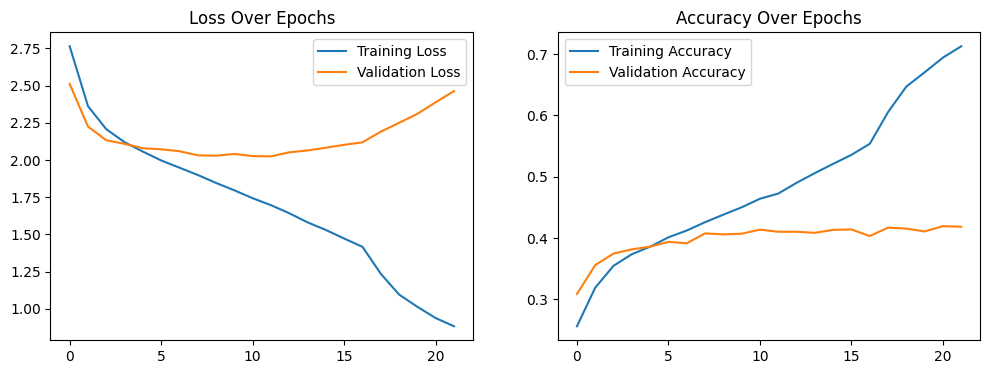

In [15]:
# Plot training history
import matplotlib.pyplot as plt

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss Over Epochs')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Accuracy Over Epochs')
    ax2.legend()

    plt.show()

plot_history(history)

In [17]:
import numpy as np
import json

def generate_therapeutic_story(model, char_to_idx, idx_to_char,
                              mood_inputs, max_length=500, temperature=0.7):
    """
    Generate a therapeutic story based on mood inputs

    Parameters:
    - model: Trained GRU model
    - char_to_idx, idx_to_char: Character mappings
    - mood_inputs: Dictionary containing all mood inputs
    - max_length: Maximum story length in characters
    - temperature: Creativity level (0.1-1.5)

    Returns:
    - Generated therapeutic story
    """

    # Extract mood inputs
    child_name = mood_inputs.get('name', 'රවි')
    mood_icon = mood_inputs.get('mood_icon', 'neutral')  # sad, anxious, empty, calm
    weather = mood_inputs.get('weather', 'sunny')  # sunny, rainy, stormy, foggy
    character = mood_inputs.get('character', 'hare')  # hare, lion, elephant
    starter = mood_inputs.get('starter', '')  # Optional starter sentence

    # Create personalized seed based on all inputs
    seed_text = create_personalized_seed(child_name, mood_icon, weather, character, starter)

    print(f" Generating story for: {child_name}")
    print(f" Seed: {seed_text[:50]}...")

    # Generate story continuation
    generated_story = seed_text
    for _ in range(max_length - len(seed_text)):
        # Prepare input sequence
        seq = generated_story[-100:]  # Last 100 chars
        encoded = []
        for ch in seq:
            if ch in char_to_idx:
                encoded.append(char_to_idx[ch])
            else:
                encoded.append(0)  # Unknown character

        # Pad if needed
        if len(encoded) < 100:
            encoded = [0] * (100 - len(encoded)) + encoded

        encoded = np.array([encoded])

        # Get predictions
        preds = model.predict(encoded, verbose=0)[0]

        # Apply temperature
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)

        # Sample next character
        next_idx = np.random.choice(len(idx_to_char), p=preds)
        next_char = idx_to_char[next_idx]

        generated_story += next_char

        # Stop if we hit natural ending
        if len(generated_story) > 50 and next_char in [' ', '!', '.', '?', '।']:
            # Check if recent text suggests ending
            recent = generated_story[-30:]
            if any(ending in recent for ending in ['අවසන්', 'සුබ', 'සාර්ථක', 'සතුටු']):
                break

    # Apply therapeutic ending based on mood
    final_story = add_therapeutic_ending(generated_story, mood_icon, weather, character, child_name)

    # Ensure story ends properly
    if not final_story.strip().endswith(('.', '!', '?', '။')):
        final_story += '।'

    return final_story


def create_personalized_seed(name, mood_icon, weather, character, starter=""):
    """
    Create a personalized seed text based on mood inputs
    """

    # Character mapping to Sinhala names
    char_names = {
        'hare': 'කුරුල්ලා',
        'lion': 'සිංහයා',
        'elephant': 'අලියා'
    }

    # Weather descriptions
    weather_desc = {
        'sunny': 'සූර්ය්ය පැහැයෙන් යුත් දවසක',
        'rainy': 'වැසි සහිත දවසක',
        'stormy': 'ගිගුරුම් සහිත තද කුරාල දවසක',
        'foggy': 'මීදුමින් ගැවසී ගිය දවසක'
    }

    # Mood descriptions
    mood_desc = {
        'sad': 'දුකින් පිරුණු',
        'anxious': 'කනස්සල්ලෙන් පිරුණු',
        'empty': 'හිස්කමක් දැනෙන',
        'calm': 'සන්සුන්'
    }

    # Story starters based on mood
    mood_starters = {
        'sad': f"{name}ට අද තරමක් දුකක් දැනුණි. ",
        'anxious': f"{name}ගේ හදවත තුල කනස්සල්ලක් දැනුණි. ",
        'empty': f"{name}ට අද හිස්කමක් දැනුණි. ",
        'calm': f"{name}ට අද සන්සුන් බවක් දැනුණි. "
    }

    # Create the seed
    if starter:  # If user provided a starter
        seed = starter + " "
    else:  # Generate based on mood
        seed = mood_starters.get(mood_icon, f"{name}ට අද විශේෂ දවසක් විය. ")

    # Add weather and character
    seed += f"{weather_desc.get(weather, '')} {char_names.get(character, 'කුරුල්ලා')}ගේ කතාවක් මතක් විය. "

    # Add character-specific traits
    if character == 'hare':
        seed += f"{char_names[character]} බියවූ නමුත් බුද්ධිමත් ප්‍රාණියකු විය. "
    elif character == 'lion':
        seed += f"{char_names[character]} ශක්තිමත් නමුත් තනිකම දැනුණු ප්‍රාණියකු විය. "
    elif character == 'elephant':
        seed += f"{char_names[character]} කරුණාවන්ත නමුත් ගරු භාරයක් රැගෙන සිටි ප්‍රාණියකු විය. "

    return seed[:150]  # Limit seed length


def add_therapeutic_ending(story, mood_icon, weather, character, name):
    """
    Add a therapeutic ending based on the mood
    """

    # Remove any existing endings
    story = story.rstrip('.!?।')

    # Therapeutic endings based on mood
    endings = {
        'sad': [
            f"කෙසේ වෙතත්, {name}ට අවබෝධ වුනේ දුක තාවකාලික බවයි.",
            f"අවසානයේ {name} සිතුවේ, හැම දුකක්ම අවසන් වන බවයි.",
            f"{name}ට අවබෝධ වුනේ, සැම දුකක් පසු සතුටකට මග පාදන බවයි."
        ],
        'anxious': [
            f"කනස්සල්ලෙන් පසු {name}ට අවබෝධ වුනේ, සියල්ල හොඳට වන බවයි.",
            f"{name}ගේ හදවත සන්සුන් වුනේ, බිය නිසා නොව ධෛර්යය නිසාය.",
            f"අවසානයේ {name}ට විශ්වාසයක් ඇති වුනේ, හැම ගැටලුවකටම විසඳුමක් ඇති බවයි."
        ],
        'empty': [
            f"{name}ට අවබෝධ වුනේ, හිස්කම යනු නව ආරම්භයකට පොරොන්දුවක් බවයි.",
            f"අවසානයේ {name}ගේ හදවත පිරුණේ අලුත් බලාපොරොත්තුවෙනි.",
            f"{name}ට වැටහුනේ, හැම හිස්කමක්ම පිරවිය හැකි බවයි."
        ],
        'calm': [
            f"{name}ට වැටහුනේ, මෙම සන්සුන් බව තුලින් ශක්තිය ලබා ගත හැකි බවයි.",
            f"සන්සුන් බව තුල {name}ට නව අවබෝධයක් ලැබුණි.",
            f"අවසානයේ {name} සිතුවේ, සන්සුන් බව යනු ශක්තියක් බවයි."
        ]
    }

    # Choose appropriate ending
    mood_endings = endings.get(mood_icon, endings['sad'])
    chosen_ending = np.random.choice(mood_endings)

    # Add weather-specific hope
    weather_hope = {
        'sunny': "හිරු එදිටම උදා වනවා වගේ, හැම දවසක්ම නව ආරම්භයකි.",
        'rainy': "වැස්සෙන් පසු සුන්දර පැහැයක් ඇති වනවා වගේ, දුකින් පසු සතුටක් ඇති වේ.",
        'stormy': "කුරාලයෙන් පසු සුන්දරත්වයක් ඇති වනවා වගේ, ගැටලුවලින් පසු ශක්තියක් ලැබේ.",
        'foggy': "මීදුම් කිලිටි වුනාට පසු පැහැදිලි දර්ශනයක් ඇති වනවා වගේ, ව්‍යාකූලතාවයෙන් පසු පැහැදිලි බවක් ලැබේ."
    }

    # Add final hopeful message
    final_message = weather_hope.get(weather, "හැම දවසක්ම නව අවස්ථාවක් ගෙන එයි.")

    # Combine everything
    full_story = story + " " + chosen_ending + " " + final_message

    return full_story


# Load vocabulary
def load_vocabulary():
    with open('/content/drive/My Drive/ResearchStory/vocabulary/char_to_idx.json', 'r', encoding='utf-8') as f:
        char_to_idx = json.load(f)

    with open('/content/drive/My Drive/ResearchStory/vocabulary/idx_to_char.json', 'r', encoding='utf-8') as f:
        idx_to_char = json.load(f)
        # Convert keys from string to int
        idx_to_char = {int(k): v for k, v in idx_to_char.items()}

    return char_to_idx, idx_to_char


# Example usage
def generate_full_story_example():
    # Load model and vocabulary
    from tensorflow.keras.models import load_model
    model = load_model('/content/drive/My Drive/ResearchStory/models/best_gru_model.h5')
    char_to_idx, idx_to_char = load_vocabulary()

    # Example 1: Sad child with rainy weather
    mood_inputs_1 = {
        'name': 'කවින්දී',
        'mood_icon': 'sad',
        'weather': 'rainy',
        'character': 'hare',
        'starter': 'අද දවස මට ගොඩක් දුක් ගෙනහැරෙනවා...'
    }

    print(" Example 1: Sad mood with rainy weather")
    print("="*60)
    story1 = generate_therapeutic_story(model, char_to_idx, idx_to_char,
                                       mood_inputs_1, max_length=600, temperature=0.8)
    print(story1)
    print("\n" + "="*60)

    # Example 2: Anxious child with stormy weather
    mood_inputs_2 = {
        'name': 'රවි',
        'mood_icon': 'anxious',
        'weather': 'stormy',
        'character': 'lion',
        'starter': 'මම කිසිම විටෙක කථා කරන්න අවශ්‍ය නෑ...'
    }

    print("\n Example 2: Anxious mood with stormy weather")
    print("="*60)
    story2 = generate_therapeutic_story(model, char_to_idx, idx_to_char,
                                       mood_inputs_2, max_length=600, temperature=0.7)
    print(story2)

    # Example 3: Calm child with sunny weather
    mood_inputs_3 = {
        'name': 'සුමිත්',
        'mood_icon': 'calm',
        'weather': 'sunny',
        'character': 'elephant',
        'starter': 'මගේ හිත තුල සන්සුන් බවක් රැඳී සිටිනවා...'
    }

    print("\n Example 3: Calm mood with sunny weather")
    print("="*60)
    story3 = generate_therapeutic_story(model, char_to_idx, idx_to_char,
                                       mood_inputs_3, max_length=500, temperature=0.6)
    print(story3)

    return story1, story2, story3


# Run the example
if __name__ == "__main__":
    stories = generate_full_story_example()

 Example 1: Sad mood with rainy weather
 Generating story for: කවින්දී
 Seed: අද දවස මට ගොඩක් දුක් ගෙනහැරෙනවා... වැසි සහිත දවසක ...
අද දවස මට ගොඩක් දුක් ගෙනහැරෙනවා... වැසි සහිත දවසක කුරුල්ලාගේ කතාවක් මතක් විය. කුරුල්ලා බියවූ නමුත් බුද්ධිමත් ප්‍රාණියකු විය. සමපරණය මහග මඩගටමට දම ඔබටත කහද? කවව. ආරත, වධයක මනෂයය කඳව. ධනය ඒ ගහක රතතම කර, කමරය දස එන පරසථව, අසන ව මලගවට යමට වඩ වස සටන කරය. රජ පස කමත රටක කම මල අතරන මලගහන කවල. ඉතන, රජන, පෂණය අනදර ඒක ඇරගතත උතස වගලයකට ආස ආපස වත වණ. ඊට පසව, මම උදවම. පරව ඔහ සහදරයතම රජකත අතට යනන. සදදයට කප වදදනගම ඇත කමරය මදවට බබඳ තම බලව. පසවය, ආරෂපය අපද යනව නවත ඇතළ මගන පමණම කයල. මම හතනල සහ මට කකක පසල අහනන යනවන ඕන නහ සටයය. එහ දව, මවන කවව තයන නගවලවල. ආව? අප දවස යය එය පටතත ව. ඇය භගවයක ඉඳ කනනය. මහත කවව රජ පටටය ව කෙසේ වෙතත්, කවින්දීට අවබෝධ වුනේ දුක තාවකාලික බවයි. වැස්සෙන් පසු සුන්දර පැහැයක් ඇති වනවා වගේ, දුකින් පසු සතුටක් ඇති වේ.


 Example 2: Anxious mood with stormy weather
 Generating story for: රවි
 Seed: මම කිසිම විටෙක කථා කරන්න අවශ්‍ය නෑ... ගිගුරුම් සහි...
මම කිසිම විටෙ